In [2]:
gsheet_id="1AY0BTq8kIF8VWJEcNaP9NfNr7U5h3JIZMa5WcP6Bt8Y"
sheet_name="tough_dataset"

In [3]:
gsheet_url="https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheet_id,sheet_name)

In [4]:
gsheet_url

'https://docs.google.com/spreadsheets/d/1AY0BTq8kIF8VWJEcNaP9NfNr7U5h3JIZMa5WcP6Bt8Y/gviz/tq?tqx=out:csv&sheet=tough_dataset'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
df = pd.read_csv(gsheet_url)

In [6]:
df.drop("id",axis=1,inplace=True)

In [7]:
df["next_pymnt_d"].fillna(value="Later",inplace=True)
df.head()
df.dtypes.value_counts()

object     63
float64     3
int64       2
dtype: int64

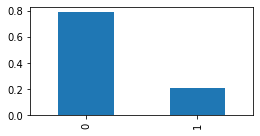

In [8]:
df["Target B"].value_counts(normalize=True).plot.bar(figsize=(4,2))
plt.show()

### More than 75 percent of the loan applications have been rejected 

In [9]:
df.describe()

,Target A,Target B,LOAN_AMT,dti,last_pymnt_amnt
count,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000
mean,58904.139794,0.210115,15345.663612,19.444117,4663.227026
std,26986.575936,0.407460,8636.391303,8.628543,6855.297610
min,0.000000,0.000000,1000.000000,0.000000,0.030000
25%,49390.000000,0.000000,8681.250000,13.035000,362.980000
50%,58440.000000,0.000000,14400.000000,18.905000,842.235000
75%,73171.750000,0.000000,20000.000000,25.580000,6832.185000
max,218587.000000,1.000000,35000.000000,51.200000,35467.750000


### attempting to find direct relations by plotting

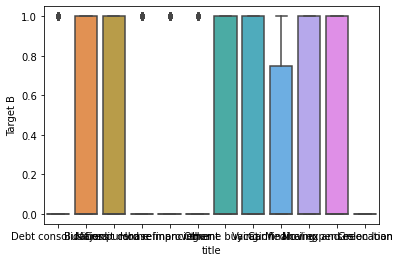

In [10]:
z = sns.boxplot(x =df["title"],y=df["Target B"])
sns.set(rc={'figure.figsize':(30,5)})



#### Most of the loan deals have been clearly rejected whose reason is clearing the debts. Activities include Debt consolidation,Credit Card refinancials,Home improvement or green loan.

#### On the other hand activites like business, home buying,medical expense, vacations, moving & relocation will indirectly help the economy grow.

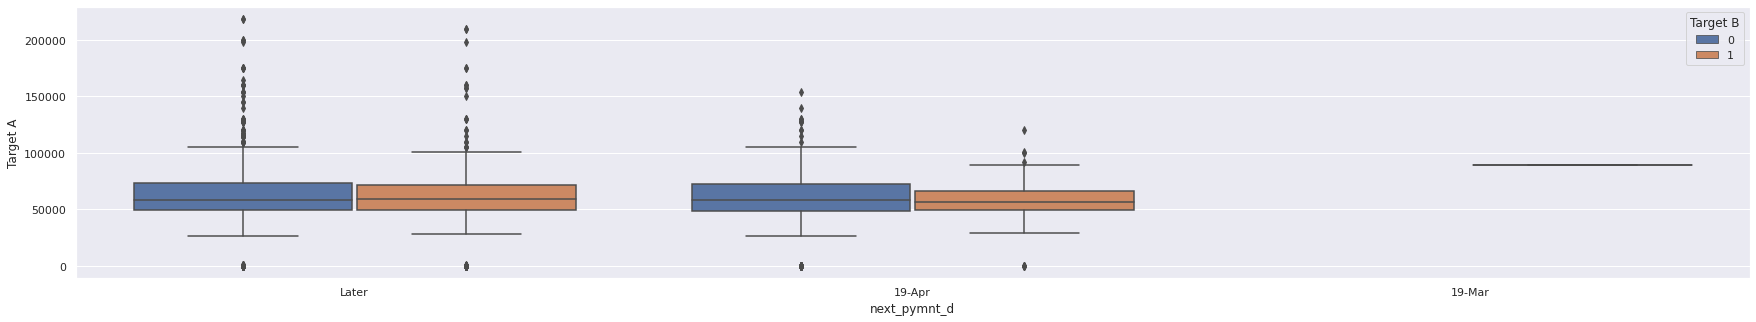

In [11]:
sns.boxplot(x=df["next_pymnt_d"],y=df["Target A"],hue=df["Target B"])
sns.set(rc={'figure.figsize':(20,5)})

### people who have a fixed date of next payment are suprisingly at disadvantage of getting high amount loan approved

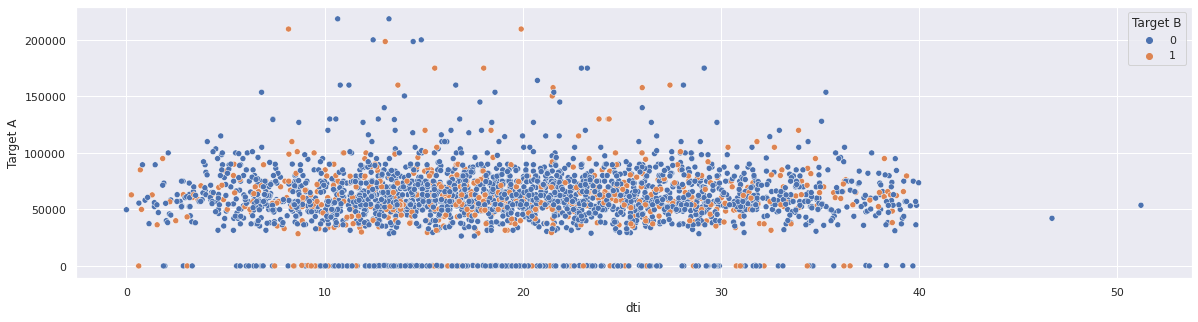

In [12]:
sns.scatterplot(x=df["dti"],y=df["Target A"],hue=df["Target B"])

#### for the mean income people, the dti doesn't determine their chances of loan approval. On the other hand, for people with low or high income, a low dti has more chances of a loan approval

## Distribution of annual income

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


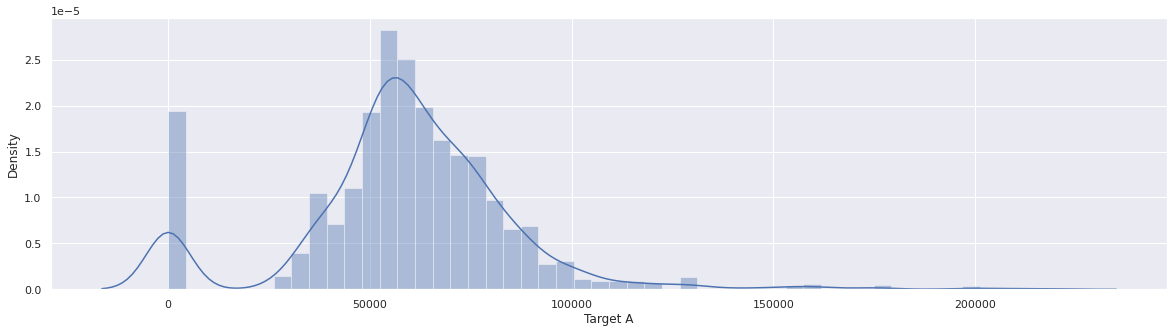

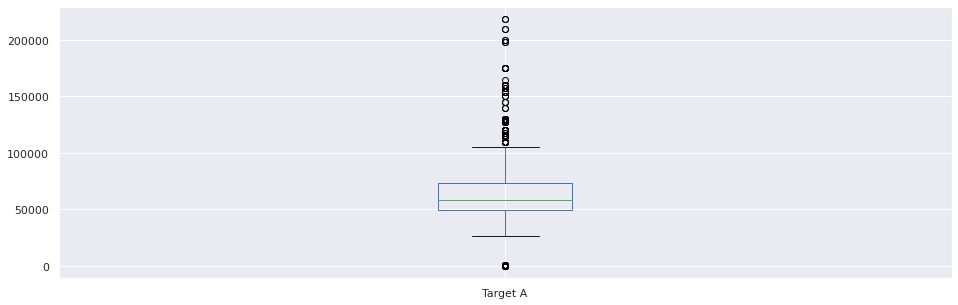

In [13]:
sns.distplot(df["Target A"])
plt.show()
df["Target A"].plot.box(figsize=(16,5))
plt.show()

### It can be inferred that most of the data in the distribution of applicant income are towards the left which means it is not normally distributed. Algorithms work better if the data is normally distributed.

In [14]:
df["FormalEducation"].value_counts()

Bachelor�s degree (BA, BS, B.Eng., etc.)                                              1442
Master�s degree (MA, MS, M.Eng., MBA, etc.)                                            716
Some college/university study without earning a degree                                 319
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     179
Associate degree                                                                        92
Other doctoral degree (Ph.D, Ed.D., etc.)                                               75
Professional degree (JD, MD, etc.)                                                      43
Primary/elementary school                                                               17
I never completed any formal education                                                  11
Name: FormalEducation, dtype: int64

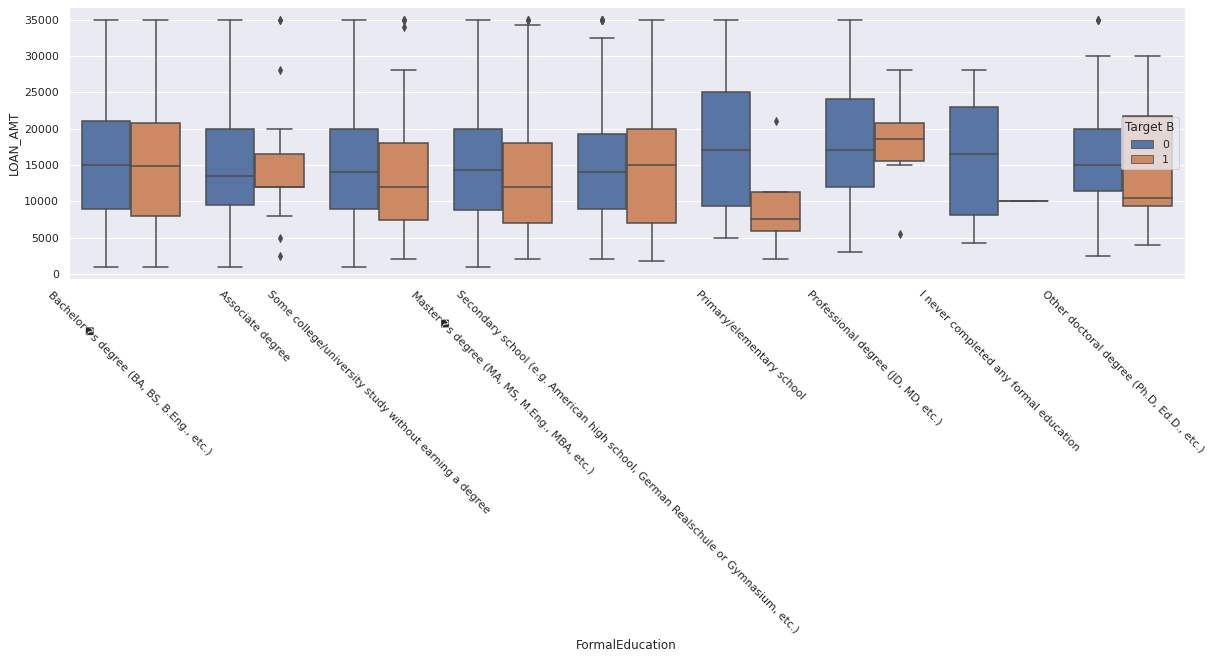

In [15]:
ax = sns.boxplot(x=df["FormalEducation"],y=df["LOAN_AMT"],hue=df["Target B"])
plt.setp(ax.get_xticklabels(), rotation=-45)
sns.set(rc={'figure.figsize':(20,5)})

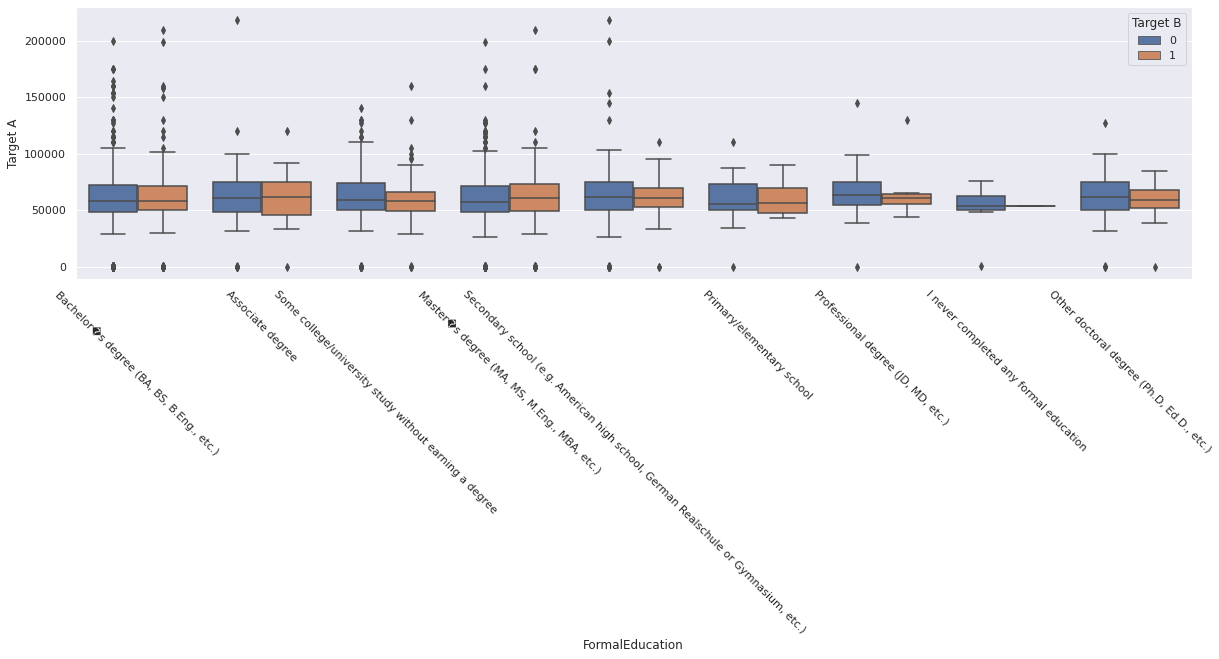

In [16]:
ax = sns.boxplot(x=df["FormalEducation"],y=df["Target A"],hue=df["Target B"])
plt.setp(ax.get_xticklabels(), rotation=-45)
sns.set(rc={'figure.figsize':(20,5)})

#### people with no formal education did not get any loan approved regardless of their income. Proffesional degree & doctoral people have less chances of loan approval as compared to other qualifications. On the other hand, people with masters degree have a slight better chance of getting a loan deal approved & also earn better than people having other types of qualifications. 

### People who aspire to be managers down the line have a better probability of getting approval. People thinking about retirement usually get low capital loans. People who wish to change their field suprisingly get high capital loans despite the risks attached with it.

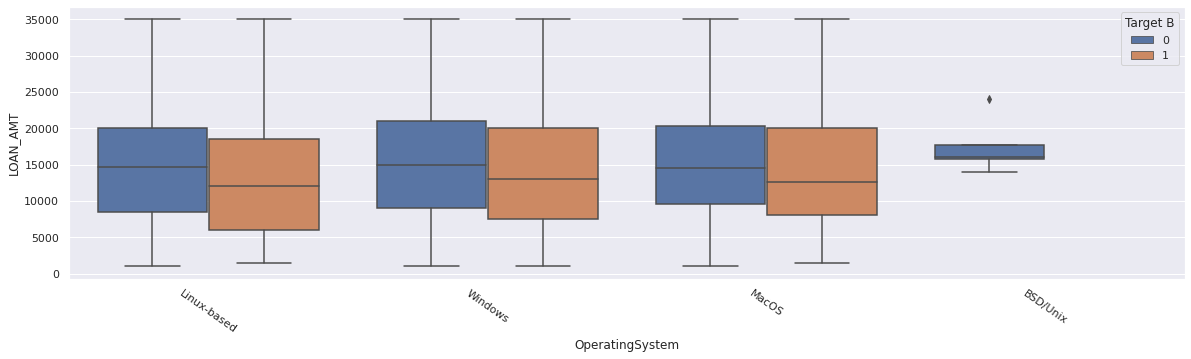

In [17]:
ax = sns.boxplot(x=df["OperatingSystem"],y=df["LOAN_AMT"],hue=df["Target B"])
plt.setp(ax.get_xticklabels(), rotation=-35)
sns.set(rc={'figure.figsize':(30,5)})

### People who use BSD/Unix as their operating system did not get any loan

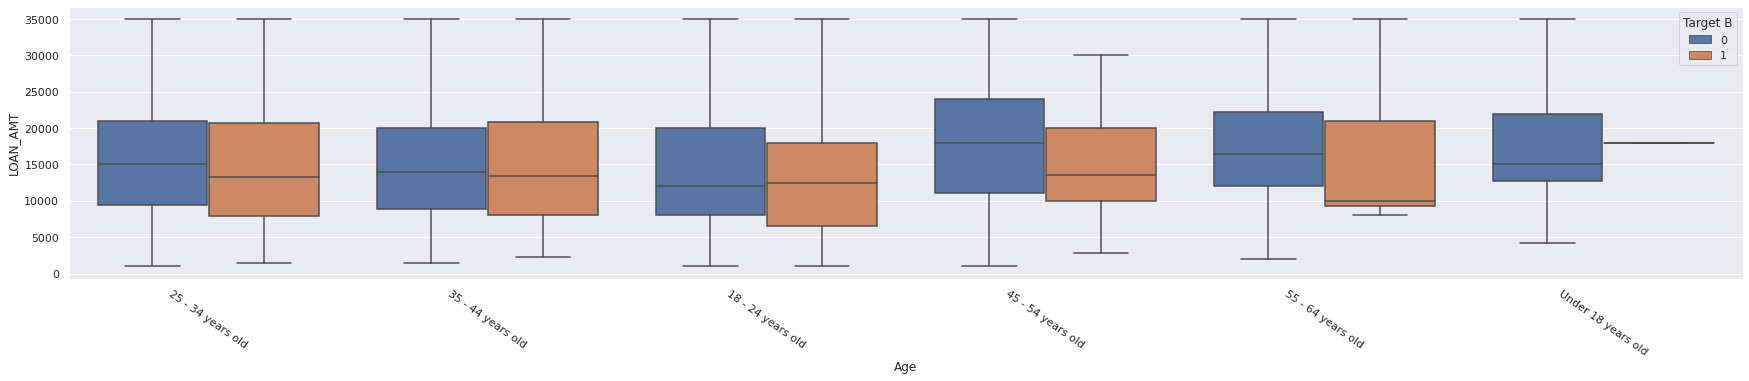

In [18]:
ax = sns.boxplot(x=df["Age"],y=df["LOAN_AMT"],hue=df["Target B"])
plt.setp(ax.get_xticklabels(), rotation=-35)
sns.set(rc={'figure.figsize':(30,5)})

#### people under 18 years old don't get approved for loans. For individuals in the range 45-64, capital approved is less than the other age groups. A solid reason for this would be that most of them would be thinking of retiring who also get less capital amount approvals as shown above.

# Data Cleaning

In [19]:
pf=df["Preferred Skills"].value_counts()  ## This column is way too generalized & varies significantly.Hence it
                                           # would underfit our model & not give a robust result
## Similiarly checking all the other columns
df["last_pymnt_amnt"].value_counts()      



465.27      11
50.00        7
778.38       6
459.58       5
569.08       5
            ..
24020.89     1
6601.51      1
290.41       1
1170.18      1
25.00        1
Name: last_pymnt_amnt, Length: 2678, dtype: int64

### From the following experiment we came to the conclusion that the following parameters vary the result i.e Target B


1.   Target A
2.LOAN_AMT
4.FormalEducation
5.UndergradMajor
6.CompanySize
7.HopeFiveYears
8.JobSearchStatus
9.LastNewJob
10.UpdateCV
11.TimeFullyProductive
12.AgreeDisagree1
13.OperatingSystem
14.CheckInCode
15.AIDangerous
16.AIInteresting
17.AIResponsible
18.AIFuture
19.title
20.dti
2.   List item



# For Target B

In [20]:
final = df[["Target B","Target A","LOAN_AMT","FormalEducation","UndergradMajor","CompanySize","HopeFiveYears","JobSearchStatus",
"LastNewJob","UpdateCV","TimeFullyProductive","AgreeDisagree1","OperatingSystem","CheckInCode","AIDangerous",
"AIInteresting","AIResponsible","AIFuture","title","dti"]]

In [21]:
final = pd.get_dummies(final,dtype=float)

### devising the correlation between various parameters

In [22]:
# assembling the features & results
X = final.iloc[:,1:]
y = final.iloc[:,0]

### devising the correlation between various parameters

In [23]:
final.corr()

,Target B,Target A,LOAN_AMT,dti,FormalEducation_Associate degree,"FormalEducation_Bachelor�s degree (BA, BS, B.Eng., etc.)",FormalEducation_I never completed any formal education,"FormalEducation_Master�s degree (MA, MS, M.Eng., MBA, etc.)","FormalEducation_Other doctoral degree (Ph.D, Ed.D., etc.)",FormalEducation_Primary/elementary school,"FormalEducation_Professional degree (JD, MD, etc.)","FormalEducation_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",FormalEducation_Some college/university study without earning a degree,"UndergradMajor_A business discipline (ex. accounting, finance, marketing)","UndergradMajor_A health science (ex. nursing, pharmacy, radiology)","UndergradMajor_A humanities discipline (ex. literature, history, philosophy)","UndergradMajor_A natural science (ex. biology, chemistry, physics)","UndergradMajor_A social science (ex. anthropology, psychology, political science)","UndergradMajor_Another engineering discipline (ex. civil, electrical, mechanical)","UndergradMajor_Computer science, computer engineering, or software engineering","UndergradMajor_Fine arts or performing arts (ex. graphic design, music, studio art)",UndergradMajor_I never declared a major,"UndergradMajor_Information systems, information technology, or system administration",UndergradMajor_Mathematics or statistics,UndergradMajor_Web development or web design,"CompanySize_1,000 to 4,999 employees",CompanySize_10 to 19 employees,"CompanySize_10,000 or more employees",CompanySize_100 to 499 employees,CompanySize_20 to 99 employees,"CompanySize_5,000 to 9,999 employees",CompanySize_500 to 999 employees,CompanySize_Fewer than 10 employees,HopeFiveYears_Doing the same work,HopeFiveYears_Retirement,HopeFiveYears_Working as a founder or co-founder of my own company,HopeFiveYears_Working as a product manager or project manager,HopeFiveYears_Working as an engineering manager or other functional manager,HopeFiveYears_Working in a career completely unrelated to software development,HopeFiveYears_Working in a different or more specialized technical role than the one I'm in now,...,AgreeDisagree1_Neither Agree nor Disagree,AgreeDisagree1_Strongly agree,AgreeDisagree1_Strongly disagree,OperatingSystem_BSD/Unix,OperatingSystem_Linux-based,OperatingSystem_MacOS,OperatingSystem_Windows,CheckInCode_A few times per week,CheckInCode_Less than once per month,CheckInCode_Multiple times per day,CheckInCode_Never,CheckInCode_Once a day,CheckInCode_Weekly or a few times per month,AIDangerous_Algorithms making important decisions,"AIDangerous_Artificial intelligence surpassing human intelligence (""the singularity"")","AIDangerous_Evolving definitions of ""fairness"" in algorithmic versus human decisions",AIDangerous_Increasing automation of jobs,AIInteresting_Algorithms making important decisions,"AIInteresting_Artificial intelligence surpassing human intelligence (""the singularity"")","AIInteresting_Evolving definitions of ""fairness"" in algorithmic versus human decisions",AIInteresting_Increasing automation of jobs,AIResponsible_A governmental or other regulatory body,AIResponsible_Nobody,AIResponsible_Prominent industry leaders,AIResponsible_The developers or the people creating the AI,"AIFuture_I don't care about it, or I haven't thought about it.",AIFuture_I'm excited about the possibilities more than worried about the dangers.,AIFuture_I'm worried about the dangers more than I'm excited about the possibilities.,title_Business,title_Car financing,title_Credit card refinancing,title_Debt consolidation,title_Green loan,title_Home buying,title_Home improvement,title_Major purchase,title_Medical expenses,title_Moving and relocation,title_Other,title_Vacation
Target B,1.000000,0.007766,-0.053278,0.001063,0.017578,0.003356,-0.017914,0.006910,0.001277,0.004709,-0.021086,-0.026545,0.005291,-0.009402,0.035780,-0.000563,-0.003984,0.051804,0.048878,-0.002995,-0.036805,0.020518,-0.014727,-0.010245,-0.013988,0.007010,-0.010920,0.0

### checking the feature importances

In [24]:
# checking the feature importances
from sklearn.ensemble import ExtraTreesRegressor 
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [25]:
a = model.feature_importances_

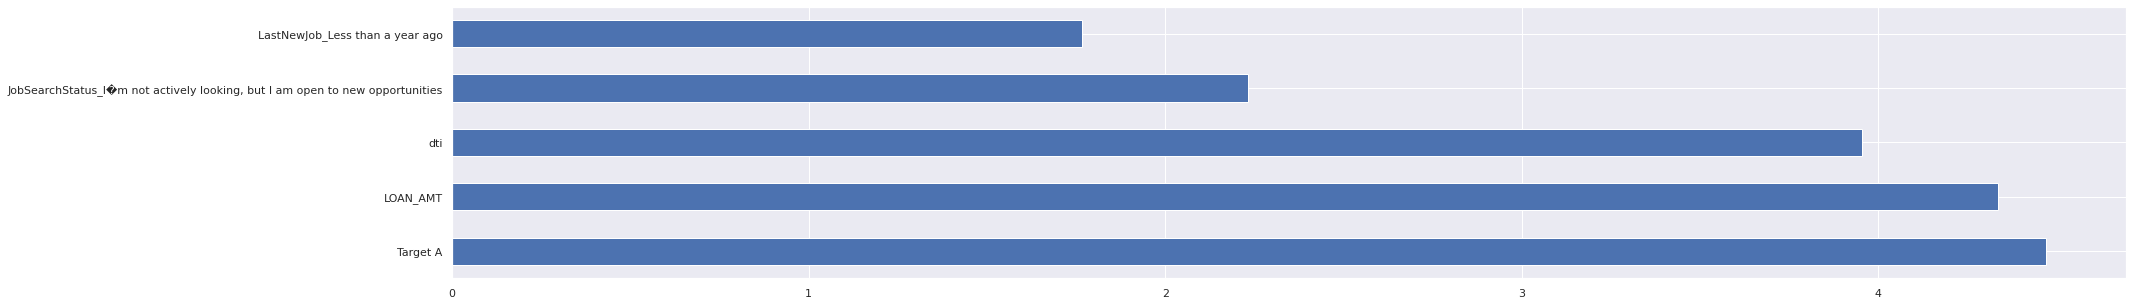

In [26]:
# plot the feature importances
importance = pd.Series(a,index=X.columns)*100
importance.nlargest(5).plot(kind="barh")
plt.show()

### as we can see, the most important features that influence the decision of Target B are



In [27]:
importance.head()

Target A                                                    4.471299
LOAN_AMT                                                    4.335054
dti                                                         3.953948
FormalEducation_Associate degree                            1.023603
FormalEducation_Bachelor�s degree (BA, BS, B.Eng., etc.)    1.580237
dtype: float64

### splitting the dataset for training & testing

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [29]:
from sklearn.svm import SVC

In [30]:
np.random.seed(1)
sc = SVC(C=6,kernel="sigmoid",degree=3)
sc.fit(X_train,y_train)
pred=sc.predict(X_test)
f1_score(y_test,pred)

0.1702127659574468

# For Target A

In [68]:
final = df[["Target A","Target B","LOAN_AMT","FormalEducation","UndergradMajor","CompanySize","HopeFiveYears","JobSearchStatus",
"LastNewJob","UpdateCV","TimeFullyProductive","AgreeDisagree1","OperatingSystem","CheckInCode","AIDangerous",
"AIInteresting","AIResponsible","AIFuture","title","dti"]]

In [69]:
final = pd.get_dummies(final,dtype=float)

In [70]:
# assembling the features & results
X = final.iloc[:,1:]
y = final.iloc[:,0]

In [67]:
# checking the feature importances
from sklearn.ensemble import ExtraTreesRegressor 
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [71]:
a = model.feature_importances_

In [ ]:
# plot the feature importances
importance = pd.Series(a,index=X.columns)*100
importance.nlargest(5).plot(kind="barh")
plt.show()

### as we can see, the most important features that influence the decision of Target A are



In [37]:
importance.head()

Target B                                                    2.363304
LOAN_AMT                                                    4.378651
dti                                                         4.882804
FormalEducation_Associate degree                            0.560845
FormalEducation_Bachelor�s degree (BA, BS, B.Eng., etc.)    1.483564
dtype: float64

### splitting the dataset for training & testing

In [52]:
X=final[["Target B","LOAN_AMT","dti","FormalEducation_Associate degree","FormalEducation_Bachelor�s degree (BA, BS, B.Eng., etc.)"]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [53]:
from sklearn.svm import SVR

In [54]:
lr = SVR(C=0.2,kernel="sigmoid",degree=2)
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,y_test ,squared=False)

29096.55530564996

In [64]:
X_train


,Target B,LOAN_AMT,dti,FormalEducation_Associate degree,"FormalEducation_Bachelor�s degree (BA, BS, B.Eng., etc.)"
128,0,14400,17.02,0.0,1.0
1653,0,20000,22.40,0.0,1.0
763,1,5000,16.36,0.0,1.0
616,0,21150,26.17,0.0,1.0
1462,1,7450,17.26,0.0,0.0
...,...,...,...,...,...
2289,0,3500,22.82,0.0,1.0
1860,0,2650,28.79,0.0,1.0
1481,0,20000,24.68,0.0,0.0
443,1,6000,19.96,0.0,1.0


In [62]:
ans =lr.predict([[0,14400,17.02,0.0,1.0]])
ans

array([58674.66129328])

In [ ]:
plt.scatter(y_test,prediction)

### Values obtained:(when last run before submitting)
1. F1 Score=0.2153
2. RMSE=28048.69

##------------------------THE END-------------------------------